In [13]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

## Data Exploration

In [2]:
data = pd.read_excel("Canva_reviews.xlsx")

In [3]:
data.head()

,reviewId,userName,userImage,review,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Sentiment,Sub Category,Sub Category_test
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533Fmoxv...,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14...,Overall it's really an amazing app. I've been ...,4,528,2.116.0,2021-06-17 07:18:54,Hi Donna. We are sorry that your text or desig...,2021-06-19 21:24:32,Negative,NaN,bug_picture_quality
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-...,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14...,Hey! Yes I gave a 5 star rating... coz I belie...,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaT,Positive,extremely_happy,NaN
2,gp:AOqpTOE86hSyPRHZgYt28Uk5zGe4FZGb1hkmtFDiYJ2...,Theknown _unknown,https://play-lh.googleusercontent.com/a-/AOh14...,Canva used to be a good app! But recently I've...,1,160,2.116.0,2021-06-23 19:13:28,Hi there. We're sorry to hear that you are hav...,2021-06-26 20:20:56,Negative,saving_downloading_issue,bug_saving_files
3,gp:AOqpTOHSuKkVTcM3QgCCKysHQlxEnk2ocOKsUMiMIJy...,Anthony Dean,https://play-lh.googleusercontent.com/a/AATXAJ...,"It's a brilliant app, but I have just one prob...",5,145,2.116.0,2021-06-19 23:36:07,NaN,NaT,Negative,others,bug_app_crash
4,gp:AOqpTOEOrZt5H6jXPiplJyffCd5ZBnVXACTWgwNsF1R...,Neha Diana Wesley,https://play-lh.googleusercontent.com/a-/AOh14...,This was such a great app. I used to make BTS ...,4,142,2.116.0,2021-06-21 00:29:27,Hi Neha. Sorry to hear that you are unable to ...,2021-06-24 20:46:28,Negative,others,bug_other


In [4]:
data.loc[13,"review"]

'Unable to save my work. Nothing works :('

In [5]:
data.loc[13,"Sentiment"]

'Negative'

In [9]:
data.loc[1495,"review"]

'Absolutely amazing and a lifesaver for teachers.'

In [11]:
data.loc[1495,"Sentiment"]

'Positive'

### Bar Plot of 'Sentiment'

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

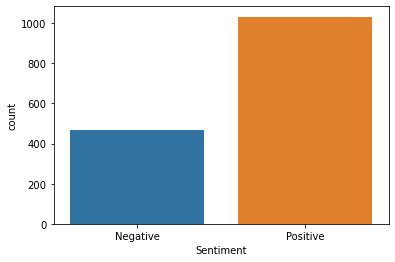

In [14]:
sns.countplot(x="Sentiment", data = data)

In [16]:
data["Sentiment"].value_counts()

Positive    1032
Negative     468
Name: Sentiment, dtype: int64

In [17]:
#Negative value percentage

468/(468+1032)

0.312

### Bar plot for "Score"

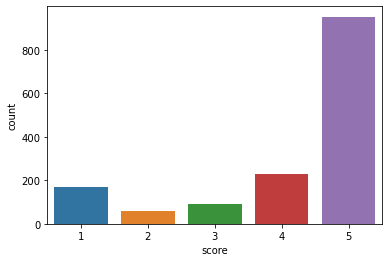

In [18]:
sns.countplot(x='score', data=data)
plt.show()

#### Check relationship between 'Score' and 'Sentiment'

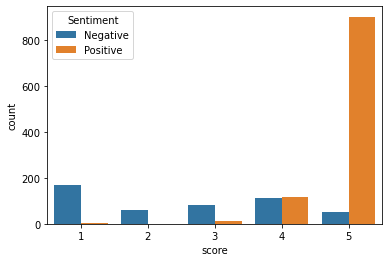

In [20]:
sns.countplot(x='score',data=data,hue='Sentiment')
plt.show()

### Find length of each 'review'

In [21]:
data['len'] = data['review'].apply(len)

In [22]:
data['len'].describe()

count    1500.000000
mean       86.468667
std        55.681355
min        20.000000
25%        54.000000
50%        75.000000
75%       102.000000
max       498.000000
Name: len, dtype: float64

C:\Users\iabhi\anaconda3\envs\tf2.8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


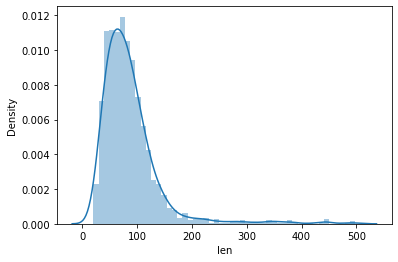

In [23]:
sns.distplot(data['len'])
plt.show()

### Plot distribution of 'len' for different 'sentiment' types
As we know, its human tendencey to write longer negative reviews and short positive reviews

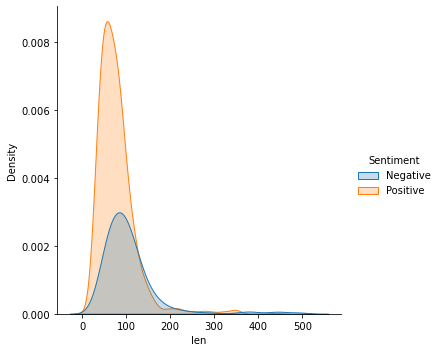

In [32]:
sns.displot(data=data, x=data["len"],hue="Sentiment", kind="kde", fill=True)
plt.show()

## NLTK

In [33]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Tokenizer
Breaking the sentence into words/tokens

#### Sentence Tokenizer

In [34]:
data = data[["review","Sentiment"]]
data.loc[13, 'review']

'Unable to save my work. Nothing works :('

In [35]:
# Sentence Tokenizer
sent_tokenize(data.loc[13,'review'])

['Unable to save my work.', 'Nothing works :(']

In [36]:
data.loc[1495, 'review']

'Absolutely amazing and a lifesaver for teachers.'

In [37]:
# Sentence Tokenizer
sent_tokenize(data.loc[1495,'review'])

['Absolutely amazing and a lifesaver for teachers.']

#### Word Tokenizer

In [39]:
word_tokenize(data.loc[13,'review'])

['Unable', 'to', 'save', 'my', 'work', '.', 'Nothing', 'works', ':', '(']

In [40]:
word_tokenize(data.loc[1495,'review'])

['Absolutely', 'amazing', 'and', 'a', 'lifesaver', 'for', 'teachers', '.']

#### Convert the data into lower case

In [41]:
reviews = data['review']

In [42]:
len(reviews)

1500

In [44]:
reviews[13].lower()

'unable to save my work. nothing works :('

In [49]:
reviews_lower = [r.lower() for r in reviews]
reviews_lower[1495]

'absolutely amazing and a lifesaver for teachers.'

In [50]:
tokens = [word_tokenize(r) for r in reviews_lower]

In [53]:
# List of tokens
tokens[13]

['unable', 'to', 'save', 'my', 'work', '.', 'nothing', 'works', ':', '(']

### Stopwords Removal

In [54]:
sw = stopwords.words('English')

In [55]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [56]:
tokens = [[word for word in t if word not in sw]for t in tokens]

In [57]:
tokens[13]

['unable', 'save', 'work', '.', 'nothing', 'works', ':', '(']

##### Remove punctuations

In [61]:
tokenizer = RegexpTokenizer(r'\w+')

In [63]:
tokens = [["".join(tokenizer.tokenize(word)) for word in t
          if len(tokenizer.tokenize(word))>0] for t in tokens]

In [64]:
reviews[13]

'Unable to save my work. Nothing works :('

In [65]:
tokens[13]

['unable', 'save', 'work', 'nothing', 'works']

### Stemming

In [66]:
porter = PorterStemmer()
lancaster = LancasterStemmer()

In [67]:
porter.stem("teachers")

'teacher'

In [68]:
lancaster.stem("teachers")

'teach'

In [69]:
## Applying porter stemmer to the tokens
tokens = [[porter.stem(word) for word in t] for t in tokens]

In [70]:
tokens[13]

['unabl', 'save', 'work', 'noth', 'work']

In [71]:
tokens[1495]

['absolut', 'amaz', 'lifesav', 'teacher']

### Word Count Distribution
Counting unique words

In [72]:
flat_tokens = [word for t in tokens for word in t]

In [73]:
len(flat_tokens)

13782

In [74]:
flat_tokens[:10]

['overal', 's', 'realli', 'amaz', 'app', 've', 'use', 'past', '5', 'year']

In [75]:
counts = Counter(flat_tokens)

In [76]:
len(counts)

1720

In [77]:
counts.most_common(10)

[('app', 932),
 ('use', 474),
 ('design', 349),
 ('easi', 293),
 ('s', 240),
 ('love', 220),
 ('good', 219),
 ('edit', 191),
 ('make', 190),
 ('great', 184)]

###  Bag of Words

In [78]:
tokens[13]

['unabl', 'save', 'work', 'noth', 'work']

In [81]:
" ".join(tokens[13])

'unabl save work noth work'

In [82]:
clean_reviws = [" ".join(t) for t in tokens]

In [83]:
clean_reviws[13]

'unabl save work noth work'

In [84]:
clean_reviws[1495]

'absolut amaz lifesav teacher'

In [ ]:
## COnverting sentence to one hot encoder

In [85]:
vect = CountVectorizer(binary=True, min_df=5)

In [86]:
X = vect.fit_transform(clean_reviws)

In [87]:
X.shape

(1500, 413)

#### Unique Values in the vocabulary

In [88]:
len(vect.vocabulary_)

413

#### Conver the sparse matrix to array

In [89]:
type(X)

scipy.sparse.csr.csr_matrix

In [90]:
X_a = X.toarray()

In [91]:
X_a.shape

(1500, 413)

In [92]:
X_a[13:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [93]:
X_a[13,:].sum()

4

In [94]:
clean_reviws[13]

'unabl save work noth work'

In [95]:
vect.get_feature_names().index("unabl")

C:\Users\iabhi\anaconda3\envs\tf2.8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


370

In [96]:
X_a[13,370]

1

In [98]:
vect.get_feature_names().index("work")

401

In [99]:
X_a[13,401]

1

In [100]:
data.head()

,review,Sentiment
0,Overall it's really an amazing app. I've been ...,Negative
1,Hey! Yes I gave a 5 star rating... coz I belie...,Positive
2,Canva used to be a good app! But recently I've...,Negative
3,"It's a brilliant app, but I have just one prob...",Negative
4,This was such a great app. I used to make BTS ...,Negative


In [101]:
data["Sentiment"] = data["Sentiment"].apply(lambda x :  1 if x=="Positive" else 0)

In [102]:
data["Sentiment"]

0       0
1       1
2       0
3       0
4       0
       ..
1495    1
1496    0
1497    0
1498    1
1499    1
Name: Sentiment, Length: 1500, dtype: int64

In [104]:
y = data["Sentiment"]

#### Split the dataset into train and test

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                   stratify=y, random_state=42)

#### Build logistic regression model

In [107]:
model = LogisticRegression()

In [108]:
model.fit(X_train, y_train)

LogisticRegression()

In [109]:
train_pred = model.predict(X_train)

In [110]:
accuracy_score(y_train, train_pred)

0.9608333333333333

In [112]:
test_pred = model.predict(X_test)

In [113]:
accuracy_score(y_test, test_pred)

0.89

#### Save bothe vectorizer and model

In [115]:
with open("Output/binary_count_vect.pkl","wb") as f:
    pickle.dump(vect, f)
    
with open("Output/binary_count_vect_lr.pkl", "wb") as f:
    pickle.dump(model,f)

#### Bag of words without Binary

In [116]:
vect = CountVectorizer(min_df=5)
X =vect.fit_transform(clean_reviws)

In [117]:
X_a = X.toarray()

In [118]:
clean_reviws[13]

'unabl save work noth work'

In [119]:
 vect.get_feature_names().index("work")

C:\Users\iabhi\anaconda3\envs\tf2.8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


401

In [120]:
## Work appears twice which gives value 2
X_a[13, 401]

2

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                   stratify=y, random_state=42)

In [122]:
model = LogisticRegression()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)

In [123]:
accuracy_score(y_train, train_pred)

0.9566666666666667

In [124]:
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.8833333333333333

## N Gram Model

In [127]:
vect = CountVectorizer(min_df=5, ngram_range=(1,3))
X = vect.fit_transform(clean_reviws)

In [128]:
X.shape

(1500, 666)

In [129]:
# Unique words increased 
vect.vocabulary_

{'overal': 425,
 'realli': 476,
 'amaz': 19,
 'app': 29,
 've': 625,
 'use': 602,
 'past': 428,
 'year': 661,
 'howev': 298,
 'one': 415,
 'issu': 314,
 'though': 579,
 'want': 633,
 'get': 257,
 'sinc': 519,
 'think': 578,
 'last': 326,
 'mani': 372,
 'text': 573,
 'zoom': 665,
 'thought': 580,
 'mobil': 385,
 'also': 17,
 'present': 455,
 'websit': 638,
 'pleas': 446,
 'fix': 237,
 'still': 539,
 'time': 582,
 'export': 219,
 'high': 293,
 'definit': 155,
 'love': 350,
 'experi': 217,
 'thank': 574,
 'realli amaz': 477,
 'amaz app': 20,
 'app ve': 66,
 've use': 628,
 'pleas fix': 447,
 'gave': 255,
 'star': 537,
 'rate': 472,
 'deserv': 156,
 'desktop': 164,
 'version': 629,
 'satisfi': 499,
 'android': 23,
 'develop': 166,
 'beauti': 86,
 'liter': 335,
 'find': 231,
 'almost': 14,
 'everyth': 212,
 'need': 395,
 'best': 89,
 'even': 206,
 'without': 645,
 'premium': 453,
 'featur': 227,
 'provid': 466,
 'us': 601,
 'lot': 346,
 'gave star': 256,
 'desktop version': 165,
 'canva': 1

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                   stratify=y, random_state=42)

In [133]:
model = LogisticRegression()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [134]:
print(f"Train Accuracy: {accuracy_score(y_train, train_pred)}")
print(f"Test Accuracy : {accuracy_score(y_test, test_pred)}")

Train Accuracy: 0.9716666666666667
Test Accuracy : 0.8933333333333333


In [135]:
with open("Output/n_gram.pkl","wb") as f:
    pickle.dump(vect, f)
    
with open("Output/n_gram_lr.pkl", "wb") as f:
    pickle.dump(model,f)

## TF - IDF

In [136]:
vect = TfidfVectorizer(min_df=5)

In [137]:
X = vect.fit_transform(clean_reviws)

In [138]:
X.shape

(1500, 413)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                   stratify=y, random_state=42)

In [140]:
model = LogisticRegression()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [141]:
print(f"Train Accuracy: {accuracy_score(y_train, train_pred)}")
print(f"Test Accuracy : {accuracy_score(y_test, test_pred)}")

Train Accuracy: 0.935
Test Accuracy : 0.8766666666666667


In [142]:
with open("Output/tfidf.pkl","wb") as f:
    pickle.dump(vect, f)
    
with open("Output/tf_idf_lr.pkl", "wb") as f:
    pickle.dump(model,f)

## Predictions on New Reviews

In [143]:
## Sample reviews

test_review_1 = '''this is truly amazing app, best for those who have content but don't know how to express it in a good and shareable manner. Thanks team canva for such a great app.
'''

test_review_2 = '''its the worst app ever I save my design its not save'''

#### Load the best model and its vectorizer


In [144]:
vect = pickle.load(open("Output/n_gram.pkl","rb"))
model = pickle.load(open("Output/n_gram_lr.pkl","rb"))

#### Convert the reviews to a bacth of one record

In [145]:
test_review_1 = [test_review_1]
test_review_2 = [test_review_2]

#### Convert to lower case

In [147]:
test_review_1 = [r.lower() for r in test_review_1]
test_review_2 = [r.lower() for r in test_review_2]

#### Tokenize the text

In [149]:
tokens_1 = [word_tokenize(r) for r in test_review_1]
tokens_2 = [word_tokenize(r) for r in test_review_2]

#### Remove stopwords

In [151]:
tokens_1 = [[word for word in t if word not in sw] for t in tokens_1]
tokens_2 = [[word for word in t if word not in sw] for t in tokens_2]

#### Remove punctuations

In [153]:
tokens_1 = [["".join(tokenizer.tokenize(word)) for word in t 
                    if len(tokenizer.tokenize(word))>0] for t in tokens_1]

tokens_2 = [["".join(tokenizer.tokenize(word)) for word in t 
                    if len(tokenizer.tokenize(word))>0] for t in tokens_2]

#### Stemming

In [154]:
tokens_1 = [[porter.stem(word) for word in t] for t in tokens_1]
tokens_2 = [[porter.stem(word) for word in t] for t in tokens_2]

In [155]:
tokens_1

[['truli',
  'amaz',
  'app',
  'best',
  'content',
  'nt',
  'know',
  'express',
  'good',
  'shareabl',
  'manner',
  'thank',
  'team',
  'canva',
  'great',
  'app']]

#### Join the tokens to form a sentence

In [156]:
clean_reviews_1 = [" ".join(reviews) for reviews in tokens_1]
clean_reviews_2 = [" ".join(reviews) for reviews in tokens_2]

#### Tranform the text using vectorizer and make predictions

In [157]:
X_test = vect.transform(clean_reviews_1)
X_test.shape

(1, 666)

In [158]:
model.predict_proba(X_test)

array([[0.00441452, 0.99558548]])

Probability of positive class is higher

In [159]:
X_test = vect.transform(clean_reviews_2)
X_test.shape

(1, 666)

In [160]:
model.predict_proba(X_test)

array([[0.87775701, 0.12224299]])

Probability of negative class is higher